# Lesson 12 activity: linear algebra & basic statistics

## Learning objectives

This activity will help you to:

1. Apply concepts from linear algebra to gain meaningful insight from data
2. Understand statistical data types
3. Use measures of shape to describe distributions
4. Apply covariance and correlation to describe relationships between variables

## Setup

Import the required libraries and load the weather dataset.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the weather dataset
url = 'https://gperdrizet.github.io/FSA_devops/assets/data/unit2/weather.csv'
df = pd.read_csv(url)
df.head()

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: linear algebra - finding similar days

**Objective**: Apply concepts from linear algebra to gain meaningful insight from data.

In linear algebra, we can treat each row of data as a vector and measure how similar different vectors are. This is useful for finding patterns - for example, finding days with similar weather conditions.

**Tasks**:

1. Select only the numeric columns from the dataset: `temperature_c`, `rainfall_inches`, `humidity_percent`, and `pressure_hpa`

2. Extract the **first row** (day 0) as a reference vector

3. For each row in the dataset, calculate the **cosine similarity** to the first row using:
   $$\text{similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$
   - You can use `np.dot()` for the dot product
   - You can use `np.linalg.norm()` to calculate vector magnitudes
   
4. Add the similarity scores as a new column to the dataframe

5. **Sort** the dataframe by similarity (highest to lowest) so the most similar days to day 0 appear first

6. Display the **top 10 most similar days** including their similarity scores and weather conditions

7. **Interpret**: Look at the top similar days - do they have similar temperature, humidity, pressure values? Does this make sense?

In [264]:
first_row = df[['temperature_c','rainfall_inches','humidity_percent','pressure_hpa']].iloc[0]
df_numeric = df[['temperature_c','rainfall_inches','humidity_percent','pressure_hpa']]

#Using np dot directly by tansposing one of the dataframes to make inner dimensions the same
df['cosine_similarity_to_first_row'] = np.dot(df_numeric, first_row) / (np.linalg.norm(df_numeric, axis=1) * np.linalg.norm(first_row))
df.sort_values('cosine_similarity_to_first_row', ascending=False, inplace=True)

df.head(10)
 
# df.describe()


,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa,cosine_similarity_to_first_row
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5,1.000000
41,Cloudy,Light Breeze,8.0,0.01,50.1,1011.5,0.999999
319,Sunny,Strong Wind,6.8,0.38,48.2,1018.5,0.999999
26,Sunny,Light Breeze,6.5,0.32,48.9,1017.4,0.999999
100,Sunny,Light Breeze,6.6,0.25,49.9,1018.3,0.999998
57,Sunny,Calm,6.0,0.29,50.0,1017.7,0.999997
346,Cloudy,Moderate Wind,6.5,0.06,46.5,1012.4,0.999996
283,Sunny,Moderate Wind,10.4,0.33,50.7,1017.5,0.999996
233,Cloudy,Light Breeze,6.7,1.01,51.0,1011.5,0.999996
18,Cloudy,Strong Wind,6.9,0.17,45.8,1011.0,0.999996


Looking at the top data it doesn't make much sense, I may have done the similarity wrong? or all the data is essentially the same.

## Exercise 2: data types and visualization

**Objective**: Understand statistical data types and visualize interactions between variables.

Understanding data types is crucial for choosing appropriate statistical methods and visualizations. In this exercise, you'll identify data types and explore how numeric variables interact with categorical ones.

**Tasks**:

1. **Identify data types**: For `humidity_percent` and `pressure_hpa`, determine what type of data they are:
   - Are they **interval** data (no true zero) or **ratio** data (has true zero)?
   - For each variable, explain your reasoning:
     - Does zero mean "none" or "absence of the quantity"?
     - Are ratios meaningful? (e.g., is 100% humidity "twice" 50% humidity?)
     - Can the value go below zero?

2. **Create visualizations**: Choose an appropriate plot type to show how `humidity_percent` and `pressure_hpa` vary across different `weather_condition` categories
   - Consider options like: box plots, violin plots, bar plots with error bars, or scatter plots with color coding
   - Create **one plot** that effectively shows the relationship between both numeric variables and the weather condition
   - You might use a single plot with subplots, or find a creative way to show all three variables together

3. **Interpret your visualization**:
   - Which weather condition tends to have the highest humidity?
   - Which weather condition tends to have the lowest pressure?
   - Do you see clear differences between weather conditions?
   - Does this pattern make sense from a meteorological perspective?

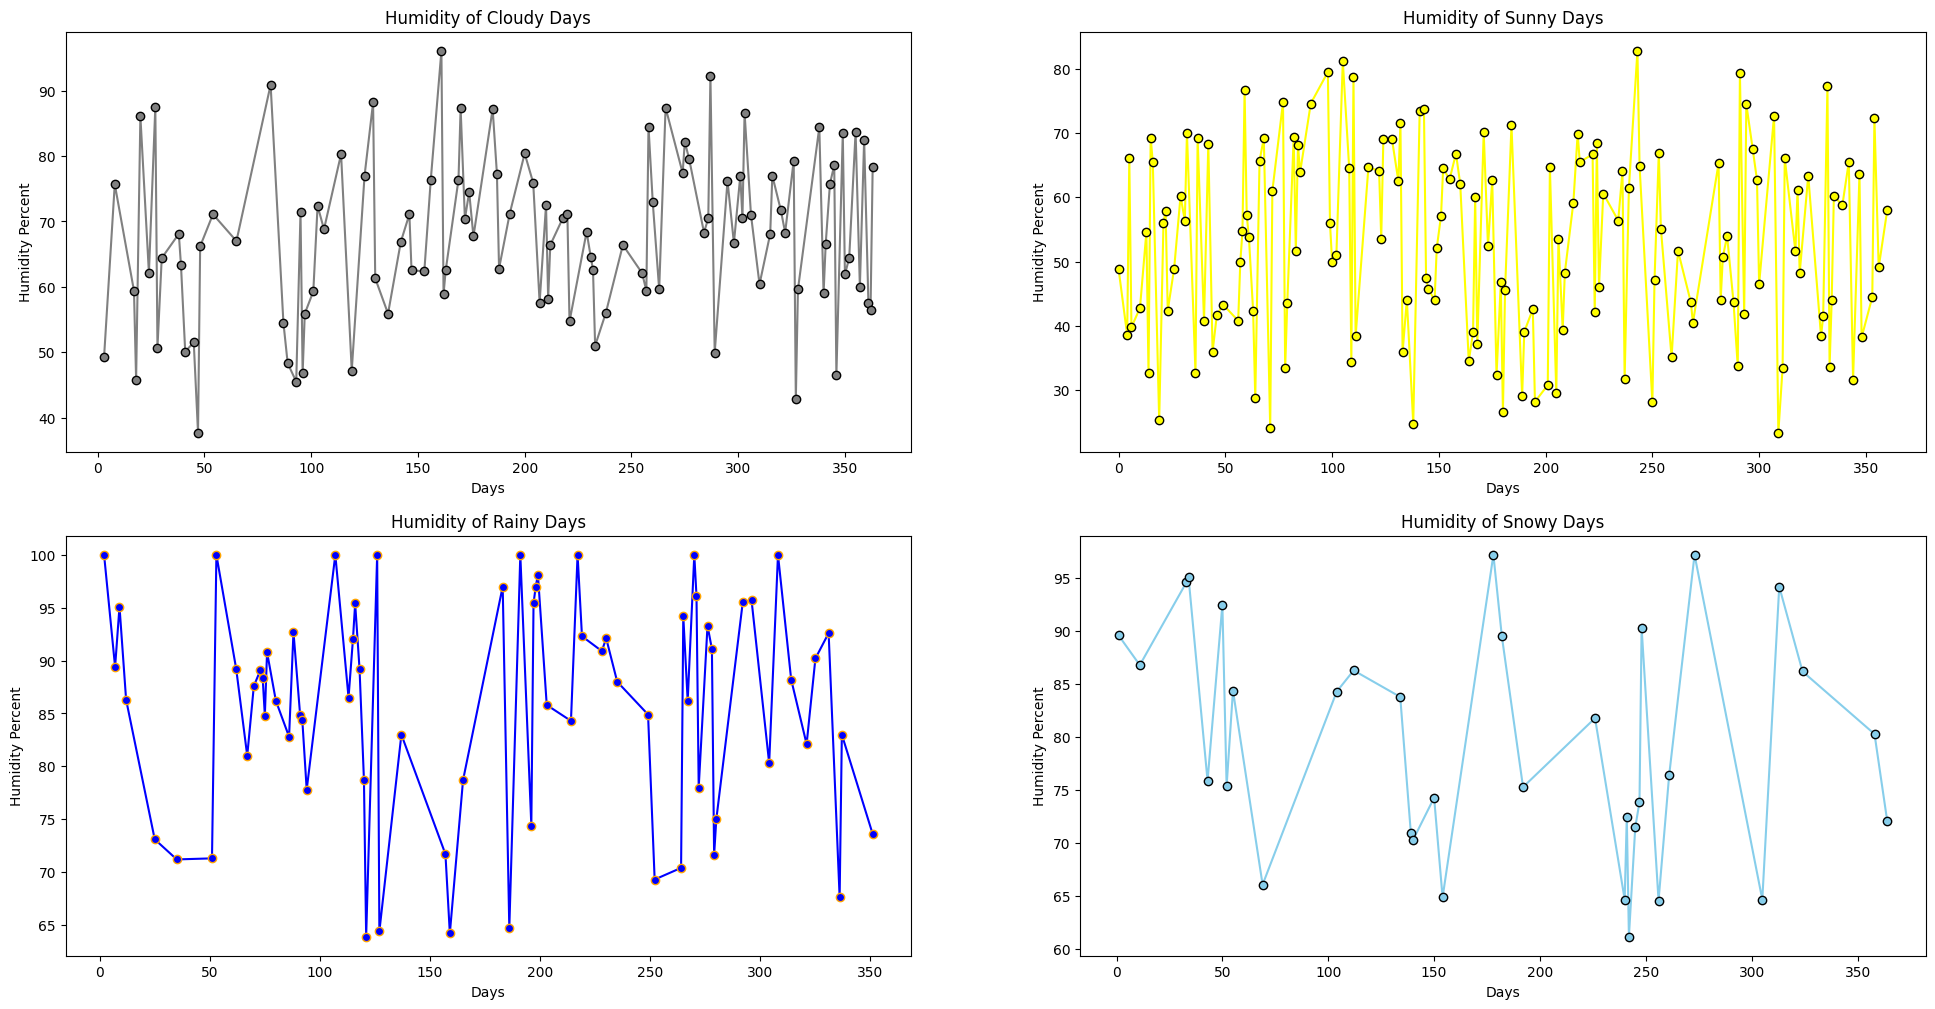

,humidity_percent,weather_condition
0,48.8,Sunny
1,89.6,Snowy
2,100.0,Rainy
3,49.3,Cloudy
4,38.6,Sunny
...,...,...
360,58.0,Sunny
361,57.6,Cloudy
362,56.4,Cloudy
363,78.4,Cloudy


In [170]:
df_humidity_pressure = df[['humidity_percent','pressure_hpa']]
df_humidity_pressure.describe()


df_humidity_weather = df[['humidity_percent','weather_condition']]
fig, hw_axes = plt.subplots(2, 2, figsize=(24,12))

#Cloudy
cloudy_days = df_humidity_weather[df_humidity_weather['weather_condition'] == 'Cloudy']
sorted_cloudy = cloudy_days.sort_index()
hw_axes[0, 0].set_title('Humidity of Cloudy Days')
hw_axes[0, 0].plot(sorted_cloudy['humidity_percent'], color='gray', marker='o', markeredgecolor='black')
hw_axes[0, 0].set_xlabel('Days')
hw_axes[0, 0].set_ylabel('Humidity Percent')

#Sunny
sunny_days = df_humidity_weather[df_humidity_weather['weather_condition'] == 'Sunny']
sorted_sunny = sunny_days.sort_index()
hw_axes[0, 1].set_title('Humidity of Sunny Days')
hw_axes[0, 1].plot(sorted_sunny['humidity_percent'], color='yellow', marker='o', markeredgecolor='black')
hw_axes[0, 1].set_xlabel('Days')
hw_axes[0, 1].set_ylabel('Humidity Percent')

#Rainy
rainy_days = df_humidity_weather[df_humidity_weather['weather_condition'] == 'Rainy']
sorted_rainy = rainy_days.sort_index()
hw_axes[1, 0].set_title('Humidity of Rainy Days')
hw_axes[1, 0].plot(sorted_rainy['humidity_percent'], color='blue', marker='o', markeredgecolor='orange')
hw_axes[1, 0].set_xlabel('Days')
hw_axes[1, 0].set_ylabel('Humidity Percent')

#Snowy
snowy_days = df_humidity_weather[df_humidity_weather['weather_condition'] == 'Snowy']
sorted_snowy = snowy_days.sort_index()
hw_axes[1, 1].set_title('Humidity of Snowy Days')
hw_axes[1, 1].plot(sorted_snowy['humidity_percent'], color='skyblue', marker='o', markeredgecolor='black')
hw_axes[1, 1].set_xlabel('Days')
hw_axes[1, 1].set_ylabel('Humidity Percent')

plt.show()

df_humidity_weather.sort_index()


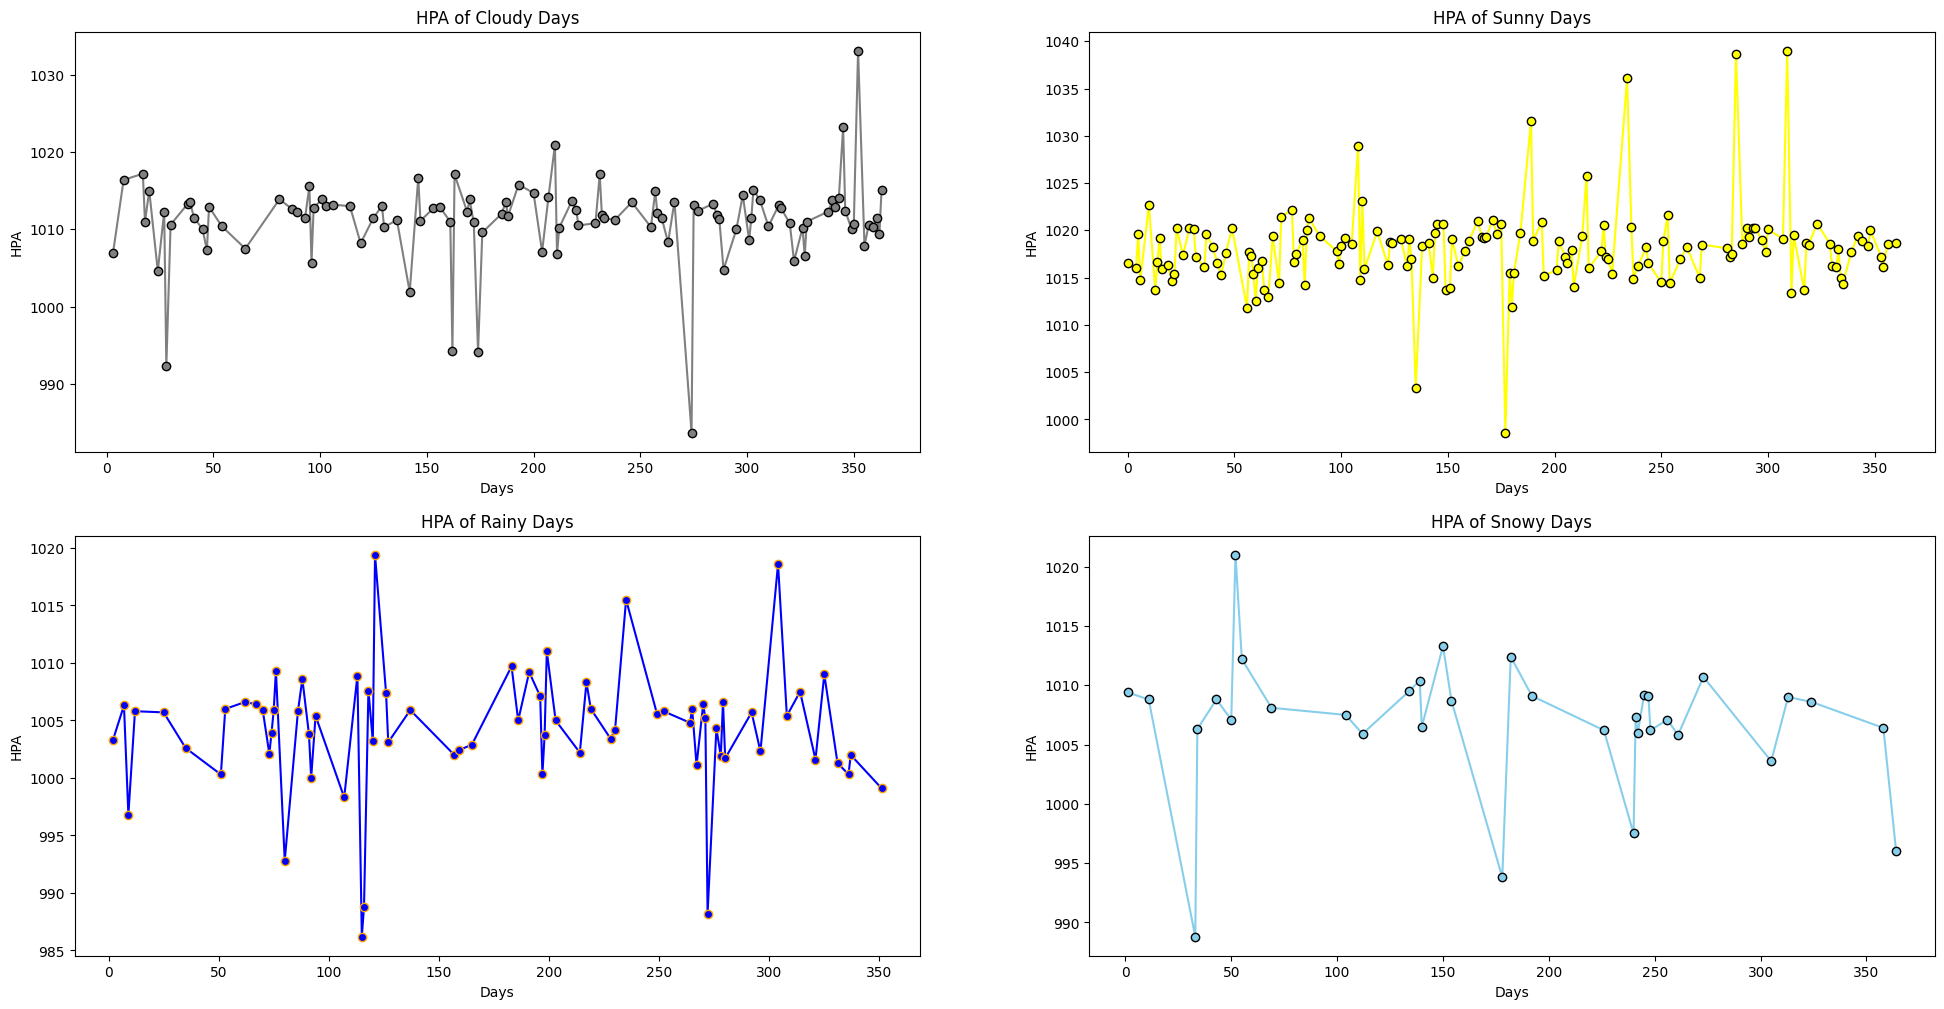

,pressure_hpa,weather_condition
0,1016.5,Sunny
1,1009.4,Snowy
2,1003.3,Rainy
3,1006.9,Cloudy
4,1016.0,Sunny
...,...,...
360,1018.7,Sunny
361,1011.5,Cloudy
362,1009.4,Cloudy
363,1015.1,Cloudy


In [171]:
df_pressure_weather = df[['pressure_hpa','weather_condition']]
fig, hw_axes = plt.subplots(2, 2, figsize=(24,12))

#Cloudy
cloudy_days = df_pressure_weather[df_pressure_weather['weather_condition'] == 'Cloudy']
sorted_cloudy = cloudy_days.sort_index()
hw_axes[0, 0].set_title('HPA of Cloudy Days')
hw_axes[0, 0].plot(sorted_cloudy['pressure_hpa'], color='gray', marker='o', markeredgecolor='black')
hw_axes[0, 0].set_xlabel('Days')
hw_axes[0, 0].set_ylabel('HPA')

#Sunny
sunny_days = df_pressure_weather[df_pressure_weather['weather_condition'] == 'Sunny']
sorted_sunny = sunny_days.sort_index()
hw_axes[0, 1].set_title('HPA of Sunny Days')
hw_axes[0, 1].plot(sorted_sunny['pressure_hpa'], color='yellow', marker='o', markeredgecolor='black')
hw_axes[0, 1].set_xlabel('Days')
hw_axes[0, 1].set_ylabel('HPA')

#Rainy
rainy_days = df_pressure_weather[df_pressure_weather['weather_condition'] == 'Rainy']
sorted_rainy = rainy_days.sort_index()
hw_axes[1, 0].set_title('HPA of Rainy Days')
hw_axes[1, 0].plot(sorted_rainy['pressure_hpa'], color='blue', marker='o', markeredgecolor='orange')
hw_axes[1, 0].set_xlabel('Days')
hw_axes[1, 0].set_ylabel('HPA')

#Snowy
snowy_days = df_pressure_weather[df_pressure_weather['weather_condition'] == 'Snowy']
sorted_snowy = snowy_days.sort_index()
hw_axes[1, 1].set_title('HPA of Snowy Days')
hw_axes[1, 1].plot(sorted_snowy['pressure_hpa'], color='skyblue', marker='o', markeredgecolor='black')
hw_axes[1, 1].set_xlabel('Days')
hw_axes[1, 1].set_ylabel('HPA')

plt.show()

df_pressure_weather.sort_index()

1. Humidity and HPA is a percentage and atmospheric pressure so it should be ratio data for both. Percentages for humidity cant be negative because its the measurement of moisture in air, at 0 just means dry air. HPA is the air pressure, it can't be negative unless there's a vacuum? I'm not 100% confirmed on that, but air always has a pressure/weight to it. 
2. If you notice the humidity on rainy days tend to be the highest and the more frequent of all the weather conditions, which is to be expected. Summer days the highest from the y axis looks to be 80 and the lowest of all weather conditions, this is also to be expected. The variations of humidity is not that surprising, it varies on the day to day basis. (need to make an overlap of the graphs to see if rainy days affect this)
3. for HPA Sunny days have the clear consistent higher pressure than any other weather condition looking at the y axis. The others usually max at around 1020 HPA with one outlier on a cloudy day. Seems like Rainy days have the lowest of all pressures on an expected basis.

Most of these make sense when thinking of a weather's expected properties and values.


## Exercise 3: analyzing distribution skewness

**Objective**: Use measures of shape to describe distributions.

Skewness describes the asymmetry of a distribution. Understanding skewness helps you choose appropriate statistical methods and understand the nature of your data.

**Tasks**:

1. Calculate the **skewness** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify which variable has:
   - The **greatest skew** (furthest from zero)
   - The **least skew** (closest to zero, most symmetric)
   - Print these findings with their skewness values

3. Create **two histograms** (side by side) showing only these two variables:
   - One histogram for the most skewed variable
   - One histogram for the least skewed variable
   - For each histogram:
     - Add vertical lines showing the mean (in red) and median (in green)
     - Include the skewness value in the title
     - Use appropriate bin sizes

4. **Interpret** your findings:
   - Why does the most skewed variable have the sign that it does? (Think about the real-world meaning)
   - For the skewed distribution, how do the mean and median compare? Why?
   - What does the skewness tell you about typical vs extreme values for this variable?
   - Why is the least skewed variable more symmetric?
   - **Bonus**: Explain why skewness matters when choosing between mean and median as a measure of central tendency.

In [224]:
from statsmodels.stats.stattools import medcouple

df_numeric = df[['temperature_c','rainfall_inches','humidity_percent','pressure_hpa']]

# Using statsmodels.robust_skewness() method
skewness = medcouple(df_numeric)
print(skewness)


[-0.01587302  0.33333333 -0.02083333 -0.13333333]


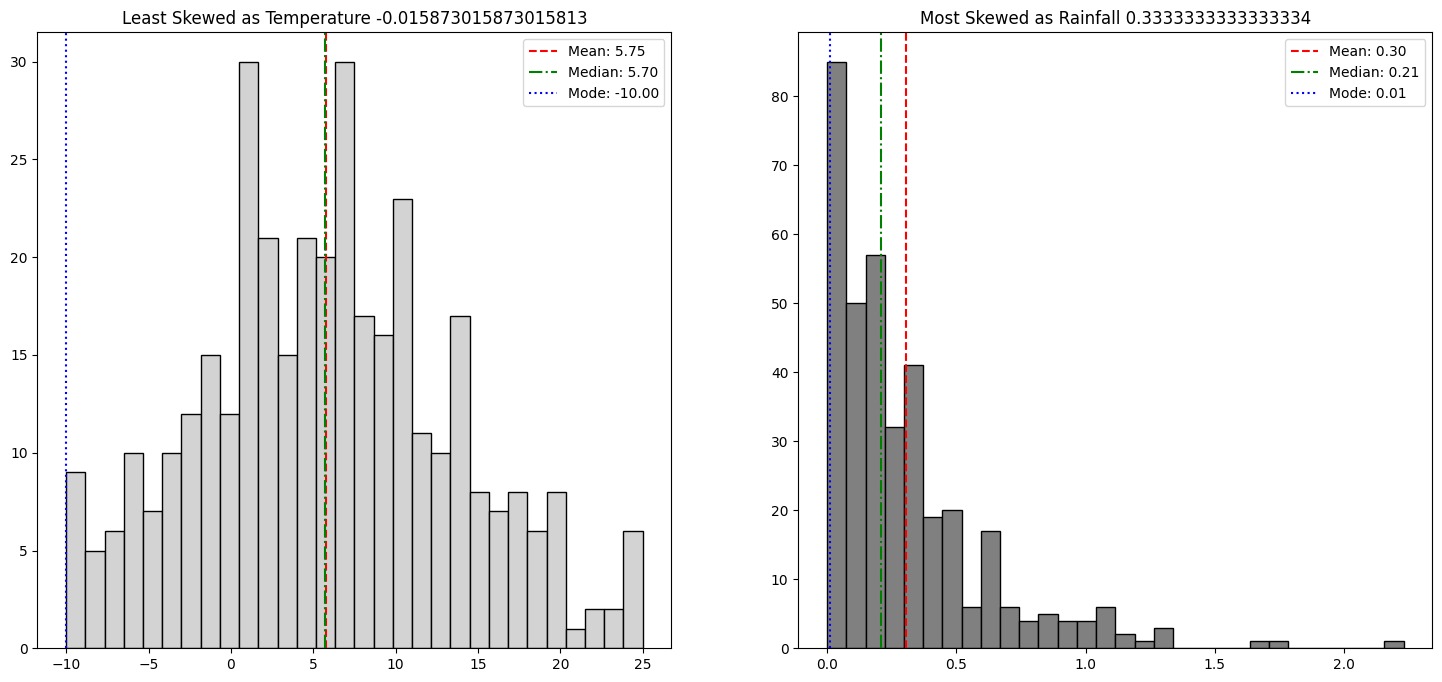

In [231]:
import statistics

df_temp_rainfall = df[['temperature_c','rainfall_inches']]
fig, tr_axes = plt.subplots(1, 2, figsize=(18,8))

tr_axes[0].set_title(f'Least Skewed as Temperature {skewness[0]}')
tr_axes[0].hist(df_temp_rainfall['temperature_c'], bins=30, color='lightgray', edgecolor='black')
tr_axes[0].set_xlabel('rainfall inches')
tr_axes[0].set_ylabel('count')
temp_mean = np.mean(df_temp_rainfall['temperature_c'])
temp_median = statistics.median(df_temp_rainfall['temperature_c'])
temp_mode = statistics.mode(df_temp_rainfall['temperature_c'])
tr_axes[0].axvline(temp_mean, color='red', linestyle='--', label=f'Mean: {temp_mean:.2f}')
tr_axes[0].axvline(temp_median, color='green', linestyle='-.', label=f'Median: {temp_median:.2f}')
tr_axes[0].axvline(temp_mode, color='blue', linestyle=':', label=f'Mode: {temp_mode:.2f}')
tr_axes[0].legend()


tr_axes[1].set_title(f'Most Skewed as Rainfall {skewness[1]}')
tr_axes[1].hist(df_temp_rainfall['rainfall_inches'], bins=30, color='gray', edgecolor='black')
tr_axes[1].set_xlabel('rainfall inches')
tr_axes[1].set_ylabel('count')
rainfall_mean = np.mean(df_temp_rainfall['rainfall_inches'])
rainfall_median = statistics.median(df_temp_rainfall['rainfall_inches'])
rainfall_mode = statistics.mode(df_temp_rainfall['rainfall_inches'])
tr_axes[1].axvline(rainfall_mean, color='red', linestyle='--', label=f'Mean: {rainfall_mean:.2f}')
tr_axes[1].axvline(rainfall_median, color='green', linestyle='-.', label=f'Median: {rainfall_median:.2f}')
tr_axes[1].axvline(rainfall_mode, color='blue', linestyle=':', label=f'Mode: {rainfall_mode:.2f}')
tr_axes[1].legend()

#just for visual reference
# fig, tr_axes = plt.subplots(1, 4, figsize=(28,8))
# tr_axes[0].hist(df['temperature_c'], bins=30, color='lightgray', edgecolor='black')
# tr_axes[1].hist(df['rainfall_inches'], bins=30, color='lightgray', edgecolor='black')
# tr_axes[2].hist(df['humidity_percent'], bins=30, color='lightgray', edgecolor='black')
# tr_axes[3].hist(df['pressure_hpa'], bins=30, color='lightgray', edgecolor='black')

plt.show()

1. Looks like the 'rainfall inches' is the furthest skewed. It is positively skewed so the mean of data is on the long right tail end. The others look negatively skewed.
2. The closest column to zero is 'temperature' making this the most symmetric. 
3. The reason I believe rainfall is the most skewed as well as positive is due to rainfall generally has to start at 0 as ratio data, unless it never stops which is unrealistic. Unlike the others which are constantly in affect and will vary day by day so there are a lot of chances to be a negative or positive skew. Even though humidity and hpa CAN be zero but, in a natural state these will never or hardly ever reach zero so their signs can vary based on sample size. 
4. The mean and median for rainfall inches is a lot farther than the temperature. I can surmise this is due to the level of skewness between the two, the closer to 0 the closer the median and mean seem to be.
5. The skewness should tell us which side of the extreme outliers will be so for rainfall the positive side of the graph making sense since that is the higher inches of rain.

## Exercise 4: exploring relationships with correlation

**Objective**: Apply covariance and correlation to describe relationships between variables.

Weather variables often have meaningful relationships. Some pairs of variables are strongly related while others have little relationship at all.

**Tasks**:

1. Calculate the **correlation matrix** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify the pair of variables with:
   - The **strongest correlation** (highest absolute value, whether positive or negative)
   - The **weakest correlation** (closest to zero)
   - Print both pairs with their correlation coefficients
   - Note whether the strongest correlation is positive or negative

3. Create **two scatter plots** (side by side or in separate figures):
   - One for the strongest correlation pair
   - One for the weakest correlation pair
   - For each plot:
     - Include the correlation coefficient in the title
     - Add appropriate axis labels

4. **Interpret** your findings:
   - What is the strongest relationship? Does it make meteorological sense?
   - Is this strongest correlation positive or negative? What does that mean in real-world terms?
   - What is the weakest relationship? Why might these variables have little correlation?
   - Compare the scatter plots: How does the pattern differ between strong and weak correlations?
   - Based on the correlation strengths, which relationship is more predictable?

In [242]:
df_numeric = df[['temperature_c','rainfall_inches','humidity_percent','pressure_hpa']]

df_numeric.corr()

,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
temperature_c,1.000000,-0.066926,-0.239894,-0.196903
rainfall_inches,-0.066926,1.000000,-0.076797,-0.066423
humidity_percent,-0.239894,-0.076797,1.000000,-0.470992
pressure_hpa,-0.196903,-0.066423,-0.470992,1.000000


In [252]:
df_numeric_unstack = df_numeric.corr().unstack().drop_duplicates()
df_numeric_unstack = df_numeric_unstack[df_numeric_unstack != 1.0]

strongest_corr = df_numeric_unstack.abs().idxmax()
print(f'Strongest pair {strongest_corr}: {df_numeric_unstack[strongest_corr]}')

weakest_corr = df_numeric_unstack.abs().idxmin()
print(f'Weakest pair {weakest_corr}: {df_numeric_unstack[weakest_corr]}')

Strongest pair ('humidity_percent', 'pressure_hpa'): -0.47099223635456555
Weakest pair ('rainfall_inches', 'pressure_hpa'): -0.06642321679132716


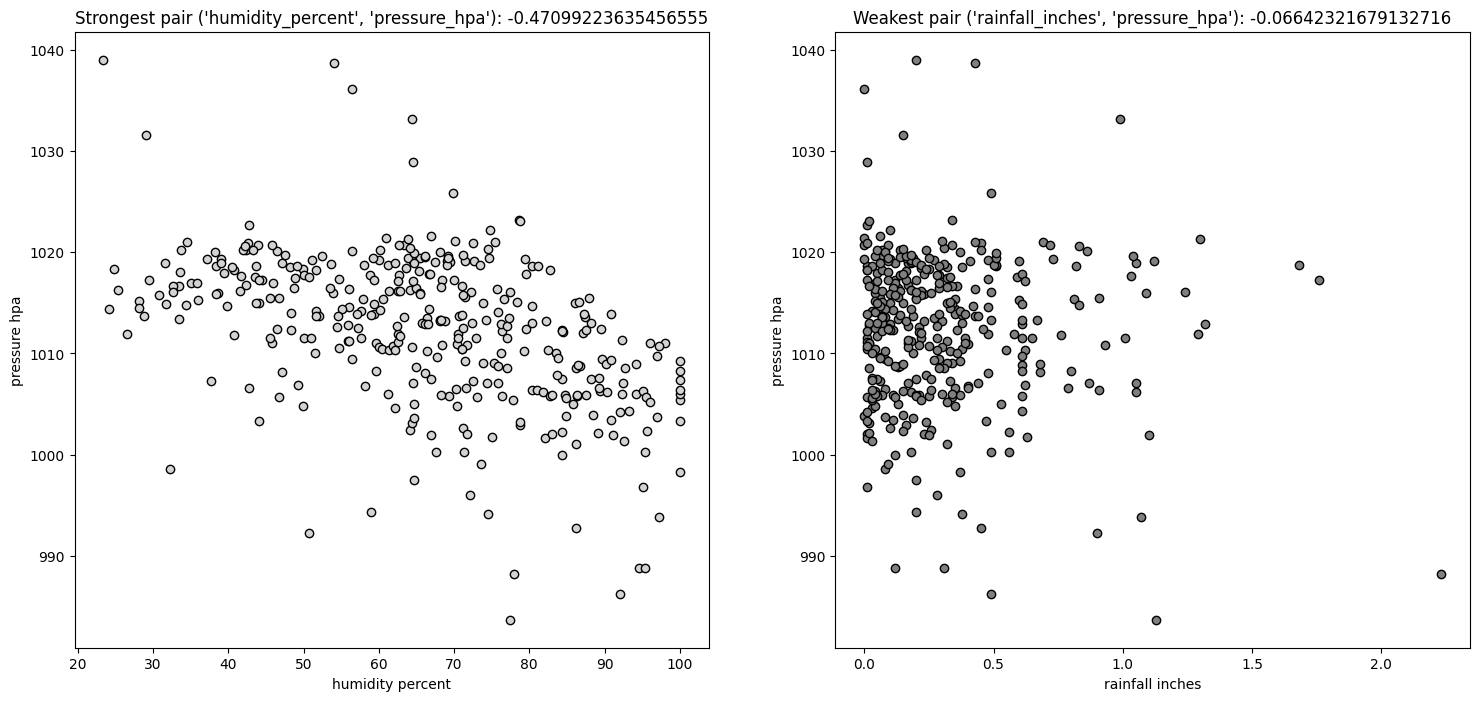

In [261]:
df_numeric = df[['temperature_c','rainfall_inches','humidity_percent','pressure_hpa']]
df_temp_rainfall = df[['temperature_c','rainfall_inches']]
fig, tr_axes = plt.subplots(1, 2, figsize=(18,8))

tr_axes[0].set_title(f'Strongest pair {strongest_corr}: {df_numeric_unstack[strongest_corr]}')
tr_axes[0].scatter(df_numeric['humidity_percent'], df_numeric['pressure_hpa'], color='lightgray', edgecolor='black')
tr_axes[0].set_xlabel('humidity percent')
tr_axes[0].set_ylabel('pressure hpa')


tr_axes[1].set_title(f'Weakest pair {weakest_corr}: {df_numeric_unstack[weakest_corr]}')
tr_axes[1].scatter(df_numeric['rainfall_inches'], df_numeric['pressure_hpa'], color='gray', edgecolor='black')
tr_axes[1].set_xlabel('rainfall inches')
tr_axes[1].set_ylabel('pressure hpa')


plt.show()

1. The strongest correlation between humidity and pressure looks a bit like as the humidity increases the pressure drops a bit, this could be due to extra moisture softening and making the air a bit heavier relieving it slightly. 
2. 